# 01 선 실행 코드

## 라이브러리 목록


In [ ]:
import requests

from bs4 import BeautifulSoup

import json

from tqdm.notebook import tqdm

import pandas as pd

import re

from urllib import parse

import time

from collections import Counter

import os

## 필요 기능 함수 치환 목록

### HTML (getHtml함수)

In [ ]:
#HTML
def getHtml(url, headers=0):
  if headers:
    resp = requests.get(url, headers = headers)
  else:
    resp = requests.get(url)
    
  soup = BeautifulSoup(resp.content, 'lxml')
  return soup

### json -> dict (getDic함수)

In [ ]:
#json >> dict
def getDic(url, params, headers=0):
  if headers:
    resp = requests.get(url, params = params, headers = headers).text
  else:
    resp = requests.get(url, params = params).text
  return json.loads(resp)

### params (qrsDic함수)

In [ ]:
#params
def qrsDic(url):
  qrs = parse.urlparse(url)
  params = parse.parse_qs(qrs.query)
  for i in params:
    params[i] = params[i][0]
  return params

In [ ]:
headers = {
    'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'
}

# 02 크롤링 코드

## 제품 Info 서치, 크롤링 → Dataframe
json 형식으로 추출 (제품 검색기능, 제품 링크추출)

In [ ]:
list_of_maker = ['캐논카메라', '소니카메라']

In [ ]:
for maker in tqdm(list_of_maker, desc = '각 키워드 검색'):

  if os.path.isfile('df_{0}_search_info.csv' .format(maker)):
    pass  

  else:
    #json
    search_dic = {
        '제품 이름' : [],
        '제조사' : [],
        '평점' : [],
        '리뷰 개수' : [],
        'combine_url_list' : []
    }
    #네이버 집계링크 목록 리스트


    search_url = 'https://search.shopping.naver.com/api/search/all'
    search_qrs = '?sort=rel&pagingIndex=1&pagingSize=40&viewType=list&\productSet=total&deliveryFee=&deliveryTypeValue=&frm=NVSHATC&query=none&origQuery=none&iq=&eq=&xq='
    search_params = qrsDic(search_qrs)
    search_params['query'] = maker

    for i in tqdm(range(1, 4), desc = f'{maker}'):  # 검색한 제조사 중 3개 페이지 
      search_params['origQuery'] = i
      
      try:
        time.sleep(1)
        get_dic = getDic(search_url, search_params)
      except:
        time.sleep(3)
        get_dic = getDic(search_url, search_params)

      num = get_dic["shoppingResult"]["products"] #페이지당 광고 제외 제품 리스트

      for loop in num:
        if loop["reviewCount"] < 100 or len(loop["productTitle"]) > 25: #리뷰수 100개 이상 제품이름 25자 이하 필터링
          continue

        mall_name = loop['mallName'] # 제외조건 변수선언

        if not mall_name:
          search_dic['제품 이름'].append(loop["productTitle"])
          search_dic['제조사'].append(maker.split('카메라')[0])
          search_dic['평점'].append(loop["scoreInfo"])
          search_dic['리뷰 개수'].append(loop["reviewCount"])
          search_dic['combine_url_list'].append(loop['crUrl'])


    df_search_info = pd.DataFrame(search_dic)
    
    df_search_info.to_csv('df_{0}_search_info.csv' .format(maker))

  df_search_info = pd.read_csv("df_{0}_search_info.csv" .format(maker), index_col=0)

  display(df_search_info)
  print()


각 키워드 검색:   0%|          | 0/2 [00:00<?, ?it/s]

,제품 이름,제조사,평점,리뷰 개수,combine_url_list
0,캐논 EOS RP,캐논카메라,4.8,359,https://cr.shopping.naver.com/adcr.nhn?x=O%2FC...
1,캐논 EOS M50 Mark II,캐논카메라,4.8,179,https://cr.shopping.naver.com/adcr.nhn?x=m1jwh...
2,캐논 EOS 5D Mark IV,캐논카메라,4.9,160,https://cr.shopping.naver.com/adcr.nhn?x=jPJbQ...
3,캐논 EOS 200D II,캐논카메라,4.8,419,https://cr.shopping.naver.com/adcr.nhn?x=qACth...
4,캐논 EOS R6,캐논카메라,5.0,459,https://cr.shopping.naver.com/adcr.nhn?x=i9TlE...
5,캐논 G7X Mark III,캐논카메라,4.8,432,https://cr.shopping.naver.com/adcr.nhn?x=hSmMF...
6,캐논 EOS 800D,캐논카메라,4.7,143,https://cr.shopping.naver.com/adcr.nhn?x=DUd1G...
7,캐논 EOS R5,캐논카메라,4.9,112,https://cr.shopping.naver.com/adcr.nhn?x=O7aPh...
8,캐논 EOS 90D,캐논카메라,4.8,239,https://cr.shopping.naver.com/adcr.nhn?x=jIW5U...
9,캐논 EOS 6D Mark II,캐논카메라,4.8,163,https://cr.shopping.naver.com/adcr.nhn?x=vdZgJ...


,제품 이름,제조사,평점,리뷰 개수,combine_url_list
0,소니 A7c,소니카메라,4.8,719,https://cr.shopping.naver.com/adcr.nhn?x=PLa8G...
1,소니 ZV-E10,소니카메라,4.8,208,https://cr.shopping.naver.com/adcr.nhn?x=JPiyM...
2,소니 A7 IV,소니카메라,4.9,227,https://cr.shopping.naver.com/adcr.nhn?x=%2B1i...
3,소니 ZV-1,소니카메라,4.8,439,https://cr.shopping.naver.com/adcr.nhn?x=PIhG2...
4,소니 A6400,소니카메라,4.8,890,https://cr.shopping.naver.com/adcr.nhn?x=jKa%2...
5,소니 A5000,소니카메라,4.6,163,https://cr.shopping.naver.com/adcr.nhn?x=KY7AV...
6,소니 DSC-W810,소니카메라,4.7,336,https://cr.shopping.naver.com/adcr.nhn?x=CiyId...
7,소니 알파 A6000,소니카메라,4.8,346,https://cr.shopping.naver.com/adcr.nhn?x=DWkRb...
8,소니 DSC-W830,소니카메라,4.7,251,https://cr.shopping.naver.com/adcr.nhn?x=tXjE6...
9,소니 A5100,소니카메라,4.8,380,https://cr.shopping.naver.com/adcr.nhn?x=KkmWI...


## 리뷰 크롤링 → Dataframe
추출한 제품링크(네이버 집계리뷰)에서 리뷰 추출

In [ ]:
for idx, maker in tqdm(enumerate(list_of_maker), desc = '각 키워드별 리뷰'):

  if os.path.isfile('df_{0}_review.csv' .format(maker)):
    pass


  else:
    review_result = {
        '제품_이름' : [],
        '리뷰_내용' : [],
        '리뷰_별점' : [],
        '리뷰_작성날짜' : [],
        '판매처' : [],
        '리뷰점수' : []
    }

    df_search_info = pd.read_csv("df_{0}_search_info.csv" .format(maker), index_col=0)

    combine_url_list = df_search_info['combine_url_list'].to_list() # 데이터프레임 내에서 url행을 리스트로 변환
    url_codes = re.findall('nvMid=(.+?)&', ''.join(combine_url_list)) #제품별 쿼리값

    review_url = 'https://search.shopping.naver.com/api/review'
    review_qrs = '?nvMid=31464497628&reviewType=ALL&sort=QUALITY&isNeedAggregation=N&isApplyFilter=N&page=none&pageSize=20'
    review_params = qrsDic(review_qrs)

    review_sort = 'RECENT' #최신순
    review_sort = 'QUALITY' #랭킹순
    review_params['sort'] = review_sort


    for search_url, url_code in tqdm(zip(combine_url_list, url_codes), desc = f'{maker}'):
      
      try:
        time.sleep(1)
        search_soup = getHtml(search_url, headers) #HTML방식 추출
      except:
        time.sleep(3)
        search_soup = getHtml(search_url, headers)


      title_tag = search_soup.select('div.top_summary_title__15yAr h2') #제품 이름
      #nums_tag = search_soup.select('div.totalArea_value__3UEUi')

      review_params['nvMid'] = url_code

      review_dic = getDic(review_url, review_params, headers)
        
      review_max_page = (review_dic['totalCount'] // int(review_params['pageSize'])) + 1 # 최대 리뷰 페이지
      #review_max_page = 1 ######################## 주석 처리시 모든 리뷰 크롤링

      for review_page in tqdm(range(1, review_max_page + 1), desc = f'{maker}_{title_tag[0].text}'):
        review_params['page'] = review_page
        time.sleep(1)
        review_dic = getDic(review_url, review_params, headers)
        
        for review_loop in review_dic["reviews"]: #각 페이지의 리뷰 추출 (평균 20개)
          review_result['제품_이름'].append(title_tag[0].text)
          review_result['리뷰_내용'].append(review_loop["content"])
          review_result['리뷰_별점'] .append(review_loop["starScore"])
          review_result['리뷰_작성날짜'].append(review_loop["registerDate"])
          review_result['판매처'].append(review_loop["mallName"])
          review_result['리뷰점수'].append(review_loop["qualityScore"])

    df_review = pd.DataFrame(review_result)

    df_review.to_csv('df_{0}_review.csv' .format(maker) )

  df_review = pd.read_csv('df_{0}_review.csv' .format(maker), index_col=0)

  display(df_review)   


각 키워드별 리뷰: 0it [00:00, ?it/s]

,제품_이름,리뷰_내용,리뷰_별점,리뷰_작성날짜,판매처,리뷰점수
0,캐논 EOS RP,"?\r<br>아시는 분들은 아시겠지만, 현재 카메라 시장은 미러리스가 대세이고, 판...",5,2022-03-13,SSG닷컴,0.841431
1,캐논 EOS RP,"구매이유는 단 하나 작아서 입니다.보통 크롭미러리스(후지 X시리즈, 소니 A6x00...",5,2020-03-27,G마켓,0.811692
2,캐논 EOS RP,여태 캐논미러리스 크롭바디 쓰다가 이번에 풀프레임 바꾸면서 R시리즈가 눈에 들어왔어...,5,2021-09-22,11번가,0.753205
3,캐논 EOS RP,디카자체는 알고 <em>구입했고 다른사이트보다 저렴해서 </em>구매했습니다.별다른...,2,2021-03-06,11번가,0.751636
4,캐논 EOS RP,동영상에 소니a7r4a 와비교해서 찍어놓았습니다. <em>크기도 작고 무게도 엄청 ...,5,2021-09-04,11번가,0.723701
...,...,...,...,...,...,...
4781,캐논 익서스 IXUS 185,빠름빠름빠름 최고최고최고 !!,5,2021-02-10,디지탈케이에스,0.045251
4782,캐논 익서스 IXUS 185,배송빠릅니다 배송빠릅니다,4,2020-09-15,준광아이티,0.045146
4783,캐논 익서스 IXUS 185,빠른배송 감사합니다.....빠른배송 감사합니다,5,2020-10-12,11번가,0.042499
4784,캐논 익서스 IXUS 185,좋아요 좋아요 좋아요 좋아요,5,2020-12-23,악세사리총판,0.040366


,제품_이름,리뷰_내용,리뷰_별점,리뷰_작성날짜,판매처,리뷰점수
0,소니 A7c,이 작은 카메라가 풀프레임이라니 믿어지지 않네요. 배송도 엄청 빨리왔습니다. ...,5,2021-02-24,11번가,0.890959
1,소니 A7c,"문제가 생겨서 소니 서비스센터로 연결해서 문의해본 결과 문의한 모든부분(소리, 렌즈...",5,2021-04-02,제이엔디지탈,0.860303
2,소니 A7c,"바디킷을 구매했는데, 렌즈킷을 받음. 상황 인지 못하고 즐겁게 언박싱하고 정품 등록...",1,2021-01-12,옥션,0.850282
3,소니 A7c,"이미 ɑ7R IV와 ɑ1을 메인으로 사용하고 있지만, 브이로그용으로 가볍게 촬영하기...",5,2021-04-20,G마켓,0.847250
4,소니 A7c,이전에 M3와 6400등을 사용하다가 이번에 스위블액정이랑 AF보고 구입했는데 무엇...,5,2020-10-12,G마켓,0.811793
...,...,...,...,...,...,...
4885,소니 알파 A7R IV,<em>빠른배송 <em>감사합니다</em></em>.. 퀵요청 드렸는데. <em>잘...,5,2020-09-21,구구지포토,0.056860
4886,소니 알파 A7R IV,만족합니다 감사합니다,5,2020-06-20,옥션,0.056357
4887,소니 알파 A7R IV,잘 받았습니다 사은품 잘받았습니다,5,2021-03-09,구구지포토,0.053113
4888,소니 알파 A7R IV,<em><em><em><em><em><em>좋아요</em></em></em></em...,5,2020-11-30,옥션,0.039715


In [ ]:
df_review_v2 = pd.read_csv('df_{0}_review.csv' .format('캐논카메라'), index_col=0)

df_review_v2 = df_review.dropna(axis = 0) #NAN값을 가진 모든 열 제거

def subm(x):
  x = x.split('-')
  return ''.join(x)

df_review_v2['리뷰_작성날짜'] = df_review_v2.리뷰_작성날짜.map(subm)

df_review_v2



# df_review_v2['리뷰_작성날짜'] = pd.to_datetime(df_review_v2['리뷰_작성날짜'])

df_review_v2 = df_review_v2.astype({'리뷰_작성날짜':'int64'})

df_review_v2 = df_review_v2[df_review_v2['리뷰_작성날짜'] >= 20220000]

df_review_v2

,제품_이름,리뷰_내용,리뷰_별점,리뷰_작성날짜,판매처,리뷰점수
0,캐논 EOS RP,"?\r<br>아시는 분들은 아시겠지만, 현재 카메라 시장은 미러리스가 대세이고, 판...",5,20220313,SSG닷컴,0.841431
5,캐논 EOS RP,중딩 아들이 사진이 취미라 새로 사줬는데 <em>기대이상으로 좋아하네요</em>~ ...,5,20220122,인터파크,0.709041
6,캐논 EOS RP,디카를 쓰다가 <em>한참 고민하다가 미러리스로 옮겼습니다</em>.<em>너무너무...,5,20220306,11번가,0.708169
7,캐논 EOS RP,70D 사용하다 무거워서 미러리스로 갈아탔는데 다시 캐논이네요..ㅎㅎ<br>익숙한게...,5,20220303,캐논스토어 서울역점,0.704962
14,캐논 EOS RP,풀프레임에 4k 지원이면서 이정도 가격이면 정말 혜자스럽지요.4k는 사실 크롭이 되...,5,20220302,11번가,0.068722
...,...,...,...,...,...,...
4714,캐논 익서스 IXUS 185,<em>사용해보니 좋습니다</em>. 많이 파세요...<em>감사합니다</em>.,5,20220602,디에스엔티,0.063019
4724,캐논 익서스 IXUS 185,<em>역시나 매우 만족스럽습니다</em> <em>감사합니다</em>,5,20220321,디에스엔티,0.062555
4730,캐논 익서스 IXUS 185,배송도 빠르고 아주 잘 받았습니다 ~ <em>품질도 좋네여</em> <em>잘 쓰겠...,4,20220218,DSLR존,0.062181
4752,캐논 익서스 IXUS 185,빠른배송 감사합니다,5,20220521,11번가,0.061136


In [ ]:
df_review_2022 = df_review_v2

df_review_2022

,제품_이름,리뷰_내용,리뷰_별점,리뷰_작성날짜,판매처,리뷰점수
0,캐논 EOS RP,"?\r<br>아시는 분들은 아시겠지만, 현재 카메라 시장은 미러리스가 대세이고, 판...",5,20220313,SSG닷컴,0.841431
5,캐논 EOS RP,중딩 아들이 사진이 취미라 새로 사줬는데 <em>기대이상으로 좋아하네요</em>~ ...,5,20220122,인터파크,0.709041
6,캐논 EOS RP,디카를 쓰다가 <em>한참 고민하다가 미러리스로 옮겼습니다</em>.<em>너무너무...,5,20220306,11번가,0.708169
7,캐논 EOS RP,70D 사용하다 무거워서 미러리스로 갈아탔는데 다시 캐논이네요..ㅎㅎ<br>익숙한게...,5,20220303,캐논스토어 서울역점,0.704962
14,캐논 EOS RP,풀프레임에 4k 지원이면서 이정도 가격이면 정말 혜자스럽지요.4k는 사실 크롭이 되...,5,20220302,11번가,0.068722
...,...,...,...,...,...,...
4714,캐논 익서스 IXUS 185,<em>사용해보니 좋습니다</em>. 많이 파세요...<em>감사합니다</em>.,5,20220602,디에스엔티,0.063019
4724,캐논 익서스 IXUS 185,<em>역시나 매우 만족스럽습니다</em> <em>감사합니다</em>,5,20220321,디에스엔티,0.062555
4730,캐논 익서스 IXUS 185,배송도 빠르고 아주 잘 받았습니다 ~ <em>품질도 좋네여</em> <em>잘 쓰겠...,4,20220218,DSLR존,0.062181
4752,캐논 익서스 IXUS 185,빠른배송 감사합니다,5,20220521,11번가,0.061136


# 03 텍스트 마이닝

## 감성분석

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from konlpy.tag import Okt # komoran, hannanum, kkma, mecab

### 데이터 전처리

#### 1) 불용어 사전 불러오기

In [ ]:
stopwords = []

with open("한국어_불용어사전.txt", 'rt') as f:
  stopwords = f.read().split()
stopwords = list( set(stopwords) )
stopwords

#### 2) 추가 불용어 사전 불러오기

In [ ]:
# stopwords = []

# with open("추가_한국어_불용어사전.txt", 'rt') as f:
#   stopwords = f.read().split()
# stopwords = list( set(stopwords) )
# stopwords

#### 1) OKT pre processing (전처리 함수)
토큰화 + 불용어처리 + 품사태깅

In [ ]:
def preprocessing(review):
    okt = Okt()
    
    #with open("한국어_불용어사전.txt", 'rt') as f:
      #stopwords = f.read().split()

    with open("추가_한국어_불용어사전.txt", 'rt') as f:
      stopwords = f.read().split()

    review_text = re.sub("[^가-힣\\s]", "", review).replace("\r", "").replace("<em>","").replace("</em>","")\
                                                    .replace("<br>","").replace("</br>","")
    
    word_review = okt.pos(review_text, stem=True)

    word_review = [(token, pos) for token, pos in word_review if not token in stopwords and len(token) > 1]
    
    word_review = [token for token, pos in word_review if pos in ['Noun']]  # 명사만 취하기

    # word_review = [token for token, pos in word_review if pos in ['Noun', 'Verb', 'Adjective']]

    return word_review

#### pre processing_v2  OKT 명사+형용사+부사

In [ ]:
def preprocessing_v2(review):
    okt = Okt()
    
    #with open("한국어_불용어사전.txt", 'rt') as f:
      #stopwords = f.read().split()

    with open("추가_한국어_불용어사전.txt", 'rt') as f:
      stopwords = f.read().split()

    review_text = re.sub("[^가-힣a-zA-z\\s]", "", review).replace("\r", "").replace("<em>","").replace("</em>","")\
                                                    .replace("<br>","").replace("</br>","")
    
    word_review = okt.pos(review_text, stem=True)

    word_review = [(token, pos) for token, pos in word_review if not token in stopwords and len(token) > 1]
    
    #word_review = [token for token, pos in word_review if pos in ['Noun']]  # 명사만 취하기

    

    word_review = [token for token, pos in word_review if pos in ['Noun', 'Verb', 'Adjective', 'Alpha']]

    

    ##################### 배송 다음에 나오는 단어 지우기 #############
    # word_review = ' '.join(word_review)
    # word_review = re.sub('[가-힣]+ 배송 [가-힣]+', "" ,word_review)
    # word_review = re.sub('배송 [가-힣]+', "" ,word_review)
    # word_review = re.sub('배송', "" ,word_review)
    # word_review = word_review.split()

    word_review = ' '.join(word_review)
    word_review = re.findall('[가-힣]+ 다양성 [가-힣]+', word_review)
    word_review = ' '.join(word_review)
    word_review = word_review.split()
    #word_review = re.sub('캐논 [가-힣]+', word_review)
    
    ##########################################################

    # word_review = [token for token, pos in word_review if pos in ['Noun', 'Verb']]

    return word_review

In [ ]:
Str = '감사 감사 배송 감사 고무'
temp = re.sub('배송 [가-힣]+', "" ,Str)
temp = temp.split()
temp

['감사', '감사', '고무']

#### 2) Mecab pre processing
토큰화 + 불용어처리 + 품사태깅

##### Mecab 설치

In [ ]:
# 코랩에서 Mecab 설치 
# !apt-get update
# !apt-get install g++ openjdk-8-jdk 
# !pip3 install konlpy JPype1-py3
# !bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

##### Mecab preprocessing 함수

In [ ]:
from konlpy.tag import Mecab
from collections import Counter

def preprocessing_Macab(review):
    mecab = Mecab()
    
    review = re.sub("[^가-힣\\s]", "", review).replace("\r", "").replace("<em>","").replace("</em>","")\
                                              .replace("<br>","").replace("</br>","")

    with open("한국어_불용어사전.txt", 'rt') as f:
      stopwords = f.read().split()

    nouns = []

    noun = mecab.nouns(review)

    for i in range( len(noun) ):
      if noun[i] in stopwords:
        noun.remove(noun[i])

    nouns.extend(noun)

    return nouns

In [ ]:
# from konlpy.tag import Mecab
# from collections import Counter

# def preprocessing_Macab(review):
#     mecab = Mecab()
    
#     review = re.sub("[^가-힣\\s]", "", review).replace("\r", "").replace("<em>","").replace("</em>","")\
#                                               .replace("<br>","").replace("</br>","")

#     with open("한국어_불용어사전.txt", 'rt') as f:
#       stopwords = f.read().split()

#     nouns = []

#     noun = mecab.nouns(review)

#     noun = [token for token in noun if not token in stopwords]

#     nouns.extend(noun)

#     return nouns

## 키워드 분석

### OKT 제조사 별 키워드 분석
Okt

In [ ]:
from collections import Counter

noun_count_list = []

for maker in tqdm( list_of_maker ):
  df_review = pd.read_csv('df_{0}_review.csv' .format(maker), index_col=0)
  tmp_list = []

  for i in tqdm( df_review['리뷰_내용'], desc = f'{maker}' ):
    tmp = preprocessing( str(i) )
    tmp_list.extend( tmp )
  
  cnt = Counter( tmp_list )

  #all_of_count = dict( sorted( cnt.items(), key=lambda x: x[1], reverse=True ) )

  all_of_count = sorted( cnt.items(), key=lambda x: x[1], reverse=True )
  
  top20_of_count = dict(all_of_count[:]) #상위 20위권

  noun_count_list.append( top20_of_count )
  
for i in noun_count_list:
  print( i )

  0%|          | 0/2 [00:00<?, ?it/s]

캐논카메라:   0%|          | 0/4847 [00:00<?, ?it/s]

소니카메라:   0%|          | 0/4903 [00:00<?, ?it/s]

{'가격': 348, '사진': 337, '캐논': 326, '렌즈': 278, '바디': 141, '화질': 126, '성능': 124, '미러리스': 107, '촬영': 107, '배터리': 89, '기능': 84, '설명': 84, '필름': 71, '색감': 69, '입문': 69, '가성': 64, '액정': 55, '영상': 52, '서비스': 49, '풀프레임': 43, '품질': 43, '디자인': 42, '소니': 38, '메모리': 38, '동영상': 37, '가장': 37, '무게': 37, '휴대': 35, '작동': 35, '모델': 33, '초점': 33, '발송': 32, '색상': 32, '케이스': 31, '여행': 29, '유튜브': 28, '삼각대': 28, '리뷰': 28, '포함': 27, '컴팩트': 27, '크기': 26, '기간': 26, '인증': 26, '당일': 25, '신경': 24, '충전': 23, '처리': 23, '초보자': 22, '사이즈': 22, '미리': 22, '디카': 21, '생산': 21, '고장': 21, '출고': 21, '초보': 20, '반품': 19, '기본': 19, '인터넷': 19, '시작': 19, '온라인': 19, '업무': 18, '속도': 18, '화면': 18, '연결': 18, '신뢰': 18, '현장': 18, '크롭': 17, '옵션': 17, '일자': 17, '결정': 17, '하이마트': 17, '고가': 17, '퀄리티': 16, '마이크': 16, '파우치': 16, '활용': 16, '자주': 16, '방법': 16, '니콘': 15, '일반': 15, '조작': 15, '에어캡': 15, '블로그': 15, '업그레이드': 15, '악세사리': 15, '핸드폰': 15, '얼른': 15, '취미': 14, '펌웨어': 14, '테스트': 14, '한지': 14, '변경': 14, '예전': 14, '요즘': 13, '충전기': 13, '사실': 1

### Mecab 제조사 별 키워드 분석
Mecab ##FIXME

In [ ]:
# from konlpy.tag import Mecab
# from collections import Counter

# noun_count_list = []
# all_noun_count_list = []
# mecab = Mecab()
# for maker in tqdm( list_of_maker ):
#   df_review = pd.read_csv('df_{0}_review.csv' .format(maker), index_col=0)
#   tmp_list = []

#   for i in tqdm( df_review['리뷰_내용'], desc = f'{maker}' ):    
    

#     noun = mecab.nouns(i)
#     tmp_list.extend(noun)
  
#   cnt = Counter( tmp_list )

#   #all_of_count = dict( sorted( cnt.items(), key=lambda x: x[1], reverse=True ) )

#   all_of_count = sorted( cnt.items(), key=lambda x: x[1], reverse=True )
  
#   top20_of_count = dict(all_of_count[:20]) #상위 기준 선정

#   noun_count_list.append( top20_of_count )
#   all_noun_count_list.append( all_of_count )
  
# for i in noun_count_list:
#   print( i )

## 부정 리뷰 키워드 분석

### 필터링 코드

In [ ]:
list_of_maker = ['캐논카메라', '소니카메라']

for maker in list_of_maker:
  df_review = pd.read_csv('df_{0}_review.csv' .format(maker), index_col=0)

  df_review = df_review.dropna(axis = 0) #NAN값을 가진 모든 열 제거

  df_review = df_review.astype({'리뷰_별점':'int64'}) #리뷰_별점 행의 타입 변경

  df_review_nagetive = df_review[ df_review['리뷰_별점'] <= 3  ]#별점 3점 이하의 열만 추출

  df_review_nagetive = df_review_nagetive.reset_index(drop = True) #인덱스값 리셋

  df_review_nagetive.to_csv('df_{0}_review_nagetive.csv' .format(maker) )

  display(df_review_nagetive)

,제품_이름,리뷰_내용,리뷰_별점,리뷰_작성날짜,판매처,리뷰점수
0,캐논 EOS RP,디카자체는 알고 <em>구입했고 다른사이트보다 저렴해서 </em>구매했습니다.별다른...,2,2021-03-06,11번가,0.751636
1,캐논 EOS RP,패키지4를 구매신청했다가 이후 별도의 통보 없이 단품으로만 배송와서 제가 따로 문의...,1,2021-07-27,11번가,0.069329
2,캐논 EOS RP,가성비가 좋은데... 시간이 갈수록 가격이 하락하네요 그게 좀 억울,3,2022-07-01,동디지털,0.065965
3,캐논 EOS RP,재포장티가 나지만 재품은 깨끗해서 그냥 사용합니다.,3,2020-04-29,옥션,0.065516
4,캐논 EOS RP,캐논코리아정품구매는 더 가격이들어서좀그랬어요,3,2020-07-20,옥션,0.065411
...,...,...,...,...,...,...
148,캐논 익서스 IXUS 185,딱 요 가격 만큼이네요,3,2020-01-14,daewon215,0.064428
149,캐논 익서스 IXUS 185,잘쓰고 있습니다^^~,3,2020-11-14,준광아이티,0.064301
150,캐논 익서스 IXUS 185,괜찮아요,3,2019-12-21,옥션,0.063972
151,캐논 익서스 IXUS 185,<em>괜찮습니다</em>. 생각한 대로 깔끔합니다. <em>사장님 친절하세요</em>.,3,2021-05-28,DSLR존,0.063743


,제품_이름,리뷰_내용,리뷰_별점,리뷰_작성날짜,판매처,리뷰점수
0,소니 A7c,"바디킷을 구매했는데, 렌즈킷을 받음. 상황 인지 못하고 즐겁게 언박싱하고 정품 등록...",1,2021-01-12,옥션,0.850282
1,소니 A7c,캐논의 카메라를 사용하다 영상에 흥미를 느끼기 시작하면소 소니에 대한 관심이 높아졌...,3,2022-07-23,G마켓,0.778869
2,소니 A7c,"플바디를 한번쯤은 구입해서 사용해야 되지 않을까 해서 많이 망설이다가 구입했는데요,...",1,2020-10-31,G마켓,0.725399
3,소니 A7c,배송은 빨랐어요<br>근데 같이 주신 메모리카드는 스티커 떼져있고<br>스크래치가 ...,3,2021-06-15,하이마트쇼핑몰,0.683493
4,소니 A7c,<em>상품은 다좋다</em> 판매자가 씰을자른제품을 소니 씰을덧씌워서 드라이기신공...,1,2020-11-17,11번가,0.662368
...,...,...,...,...,...,...
168,소니 A6600,"미개봉 새상품 아님, 잘못된 고지임.",3,2020-11-02,G마켓,0.064891
169,소니 A6600,번들렌즈 킷에 번들렌즈만 빼고 바디 보내주셨네요 <br>바디킷이 따로 나올텐데......,2,2020-05-20,옥션,0.064506
170,소니 A6600,빠른처리에 감사합니다.<br>정품등록 하였습니다.,3,2019-12-28,옥션,0.063069
171,소니 A6600,새제품이지만.. 개봉품이왔어요.. 문의는 했지만 새제품이란 말뿐...,2,2020-10-12,아이파크존,0.057894


### 키워드 분석

In [ ]:
noun_count_list = []

for maker in tqdm( list_of_maker ):
  df_review_nagetive = pd.read_csv('df_{0}_review_nagetive.csv' .format(maker) , index_col=0)
  df_review_nagetive = df_review_nagetive.dropna(axis = 0)

  tmp_list = []

  for i in tqdm( df_review_nagetive['리뷰_내용'], desc = f'{maker}' ):
    tmp = preprocessing_v2( str(i) )
    tmp_list.extend( tmp )
  
  cnt = Counter( tmp_list )

  #all_of_count = dict( sorted( cnt.items(), key=lambda x: x[1], reverse=True ) )

  all_of_count = sorted( cnt.items(), key=lambda x: x[1], reverse=True )
  
  top20_of_count = dict(all_of_count[:20]) #상위 20위권

  noun_count_list.append( top20_of_count )
  
for i in noun_count_list:
  print( i )

  0%|          | 0/2 [00:00<?, ?it/s]

캐논카메라:   0%|          | 0/153 [00:00<?, ?it/s]

소니카메라:   0%|          | 0/173 [00:00<?, ?it/s]

{'캐논': 5, '퀄리티': 1, '가다': 1, '설명': 1, '누리다': 1, '드리다': 1, '하래': 1, '빠르다': 1, '인증': 1, '주다': 1, '공식': 1}
{}


# 04 키워드 시각화

## 키워드 시각화 (1) 히스토그램

### 라이브러리

In [ ]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
!apt-get update -qq
!apt-get install fonts-nanum* -qq

!pip install chart_studio
# pandas에서 바로 plotly로 그래프를 제작해주는 라이브러리 
!pip install cufflinks

#pandas profiling
!pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
import matplotlib as mpl

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
# 폰트 지정
plt.rc('font', family=font_name)

#마이너스 깨짐현상
mpl.rc('axes', unicode_minus=False)

fm._rebuild()

NanumGothic Eco


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px



%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

# default renderer 세팅을 바꿔주기 
# https://plotly.com/python/renderers/#setting-the-default-renderer

import plotly.io as pio
pio.renderers.default = 'colab'

### 히스토그램 그리기

In [ ]:
# list_of_maker = ['캐논카메라', '소니카메라']

list_of_df = []
list_of_dic = []

for i, maker in enumerate( list_of_maker ):
  tmp_dic = {
    'Word' : [],
    'Count' : []
  }

  for j, k in noun_count_list[i].items():

    tmp_dic['Word'].append( j )
    tmp_dic['Count'].append( k )

  tmp_df = pd.DataFrame( tmp_dic )
  list_of_dic.append(tmp_dic)
  list_of_df.append(tmp_df)
  tmp_df.to_csv( 'df_keyword_n_count_of_{0}' .format( maker ) )

for i, j in enumerate(list_of_df): #데이터프레임 출력
  print(list_of_maker[i])
  display(j)
  print()

캐논카메라


,Word,Count
0,제품,769
1,오다,579
2,만족하다,565
3,친절하다,410
4,가격,383
5,보다,374
6,사진,364
7,해주다,333
8,렌즈,326
9,쓰다,310



소니카메라


,Word,Count
0,제품,1092
1,만족하다,708
2,오다,638
3,친절하다,541
4,쓰다,478
5,가격,467
6,해주다,417
7,보다,413
8,사진,409
9,렌즈,402


In [ ]:
for i in list_of_df:
  a = px.histogram( i, x='Word', y='Count', color='Word' )
  a.show()

## 키워드 시각화 (2) 워드클라우드

#### 워드클라우드 설치

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud, ImageColorGenerator

wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
             background_color='white', width=1000, height=1000, max_words=100, max_font_size=300)
wc.generate_from_frequencies(dict(noun_count_list[0]))
wc.to_file("wordcloud_camera.png")

### 실행

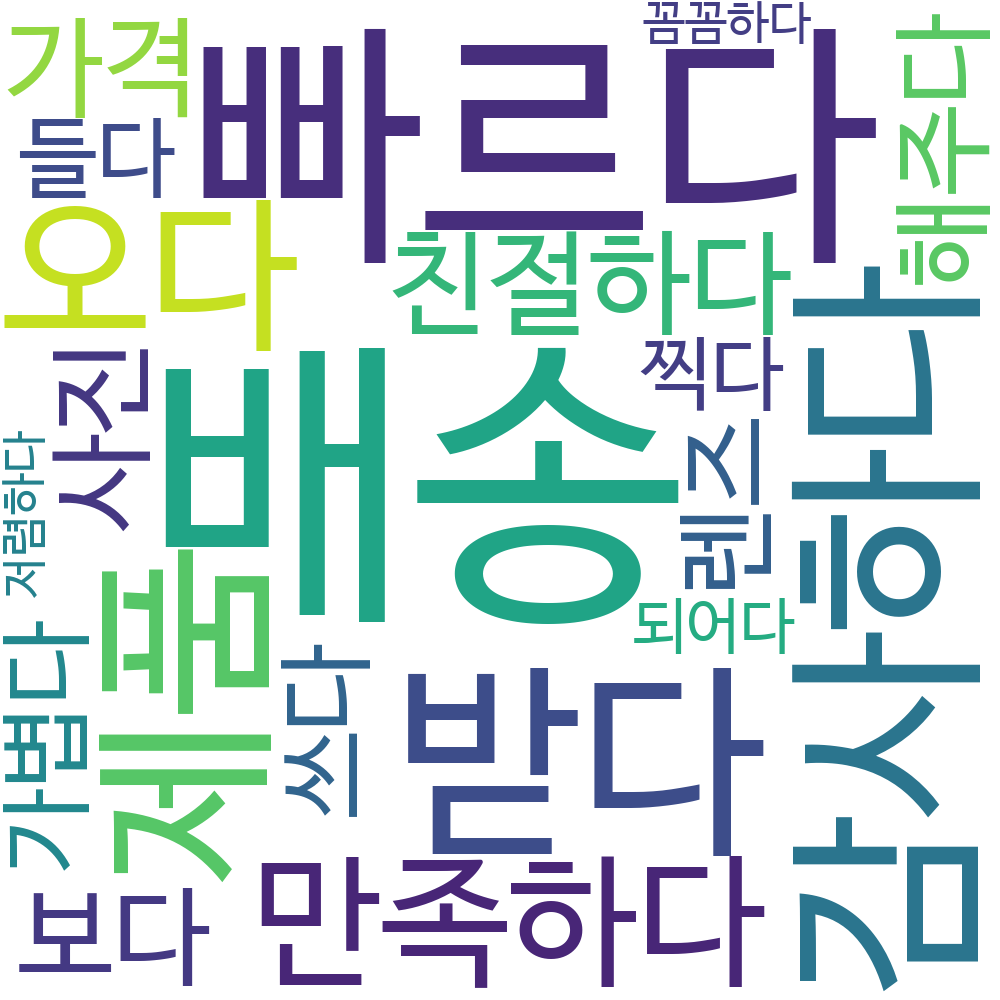

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('wordcloud_camera.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
from google.colab.patches import cv2_imshow
from PIL import Image

# mask_read = cv2.imread('icon_camera.png', cv2.IMREAD_UNCHANGED)
# mask = np.array(mask_read)

icon = Image.open("icon_camera.png")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon, icon)
mask = np.array(mask)

wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
             background_color='white', 
             mask = mask,
             width = mask.shape[1], height = mask.shape[0], max_font_size=300).generate_from_frequencies(dict(noun_count_list[0]))
wc.to_file("wordcloud_with_icon_camera.png")


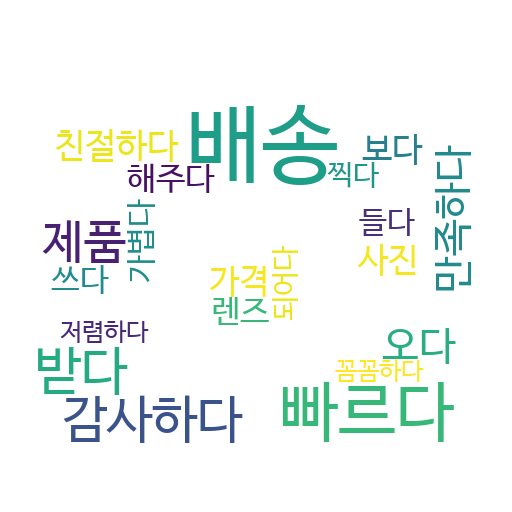

In [ ]:
img = cv2.imread('wordcloud_with_icon_camera.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
from google.colab.patches import cv2_imshow
from PIL import Image

# mask_read = cv2.imread('icon_camera.png', cv2.IMREAD_UNCHANGED)
# mask = np.array(mask_read)

icon = Image.open("icon_camera.png")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon, icon)
mask = np.array(mask)

wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
             background_color='white', 
             mask = mask,
             width = mask.shape[1], height = mask.shape[0], max_font_size=300).generate_from_frequencies(dict(all_noun_count_list[0]))
wc.to_file("wordcloud_with_icon_camera(all_words).png")

img2 = cv2.imread('wordcloud_with_icon_camera(all_words).png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img2)

NameError: ignored

# 05 TF-IDF활용 토픽 모델링
(TF-IDF(Term Frequency-Inverse Document Frequency)    
- 본격적인 자연어 처리를 위해서는 문자를 숫자로 수치화할 필요가 있습니다.  

- TF-IDF는 단어의 빈도와 역 문서 빈도(문서의 빈도에 특정 식을 취함)를 사용하여 DTM(문서 단어 행렬(Document-Term Matrix)) 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법입니다.

- https://wikidocs.net/24559


## UNI GRAM

### TF-IDF 행렬 만들기

In [ ]:
# sklearn을 통해서 TF-IDF 행렬을 만들어 줍니다. 

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=preprocessing_v2, ngram_range=(1, 1))


df_review = pd.read_csv('df_{0}_review.csv' .format('캐논카메라'), index_col=0)
df_review = df_review.dropna(axis = 0) #NAN값을 가진 모든 열 제거

tfidf = tfidf_vect.fit_transform(raw_documents = df_review['리뷰_내용'].iloc[:]) # 개수 전체

tfidf

<5049x3165 sparse matrix of type '<class 'numpy.float64'>'
	with 33710 stored elements in Compressed Sparse Row format>

### LDA 학습   
토픽의 개수를 20으로 하여 LDA 모델을 학습시켜보도록 하겠습니다.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components =5, 
                                max_iter = 20,
                                learning_method='online',
                                random_state=100)
lda_output = lda.fit_transform(tfidf)

In [ ]:
print('lda components:\n',lda.components_) 
print('shape:', lda.components_.shape) 

lda components:
 [[ 0.20121064  0.47683463 19.99721163 ...  5.40949803  0.20253445
   0.31461979]
 [ 1.39295544  0.20420128 80.54442145 ...  0.20409921  0.20662052
   0.20371872]
 [ 0.20673818  0.20005253  1.25558168 ...  0.20224414  0.20003954
   0.21206457]
 [ 0.20003037  0.20002774  0.20322508 ...  0.2000916   0.20001869
   0.20005568]
 [ 0.20092865  0.20007793  0.20617264 ...  0.20014259  0.82100961
   0.20011353]]
shape: (5, 3165)


LDA 과정에서 얻은 토픽들을 프린트해 봅시다. 토픽당 7개의 단어를 default로 설정하였습니다. 

In [ ]:
terms = tfidf_vect.get_feature_names() # 단어 집합

def get_topics(components, feature_names, n=7):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lda.components_,terms)

Topic 1: [('친절하다', 152.55), ('구매', 67.66), ('드리다', 55.13), ('해주다', 52.18), ('감사하다', 50.39), ('배송', 46.73), ('받다', 45.61)]
Topic 2: [('좋다', 159.19), ('카메라', 122.31), ('자다', 101.79), ('잘쓰다', 94.63), ('이다', 82.22), ('가격', 80.54), ('구매', 80.44)]
Topic 3: [('빨르다', 73.31), ('만족스럽다', 48.48), ('품질', 23.53), ('배송', 17.06), ('좋다', 16.69), ('아쉽다', 16.54), ('느리다', 15.65)]
Topic 4: [('빠르다', 451.44), ('배송', 427.69), ('좋다', 388.83), ('감사하다', 268.01), ('받다', 206.38), ('자다', 203.74), ('만족하다', 149.9)]
Topic 5: [('완벽하다', 16.29), ('편리하다', 14.63), ('작동', 13.77), ('굳다', 12.73), ('최신', 12.18), ('상당하다', 9.95), ('여기다', 9.69)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



### LDA 시각화

In [ ]:
# LDAvis 는 토픽 모델링에 자주 이용되는 Latent Dirichlet Allocation (LDA) 모델의 학습 결과를 시각적으로 표현하는 라이브러리입니다
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 6.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=6ad1c21e34ac397d5a37590abbdc8311b3828eeadc78b8f6288c513551b16349
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
# LDA 시각화를 진행해봅시다. 
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, tfidf, tfidf_vect, mds='tsne')
pyLDAvis.display(vis)


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr

## BI GRAM

### TF-IDF 행렬 만들기

In [ ]:
# sklearn을 통해서 TF-IDF 행렬을 만들어 줍니다. 

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=preprocessing_v2, ngram_range=(2, 2))


df_review = pd.read_csv('df_{0}_review.csv' .format('캐논카메라'), index_col=0)
df_review = df_review.dropna(axis = 0) #NAN값을 가진 모든 열 제거

tfidf = tfidf_vect.fit_transform(raw_documents = df_review['리뷰_내용'].iloc[:]) # 개수 전체

tfidf

ValueError: ignored

### LDA 학습   
토픽의 개수를 20으로 하여 LDA 모델을 학습시켜보도록 하겠습니다.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 5, 
                                max_iter = 20,
                                learning_method='online',
                                random_state=100)
lda_output = lda.fit_transform(tfidf)

In [ ]:
print('lda components:\n',lda.components_) 
print('shape:', lda.components_.shape) 

lda components:
 [[0.71397174 0.33433758 0.33419899 ... 0.3345251  0.33406865 0.47275003]
 [0.33467473 1.02959289 0.33419161 ... 0.33420244 0.33403741 0.33399512]
 [0.33467974 0.33433528 0.57750075 ... 0.58259826 0.81701843 0.33392215]]
shape: (3, 13115)


LDA 과정에서 얻은 토픽들을 프린트해 봅시다. 토픽당 7개의 단어를 default로 설정하였습니다. 

In [ ]:
terms = tfidf_vect.get_feature_names() # 단어 집합

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lda.components_,terms)

### LDA 시각화

In [ ]:
# LDAvis 는 토픽 모델링에 자주 이용되는 Latent Dirichlet Allocation (LDA) 모델의 학습 결과를 시각적으로 표현하는 라이브러리입니다
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# LDA 시각화를 진행해봅시다. 
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, tfidf, tfidf_vect, mds='tsne')
pyLDAvis.display(vis)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning:

'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming o

## 부정리뷰 BI GRAM

df_review_nagetive

### TF-IDF 행렬 만들기

In [ ]:
# sklearn을 통해서 TF-IDF 행렬을 만들어 줍니다. 

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=preprocessing_v2, ngram_range=(2, 2))

df_review = pd.read_csv('df_{0}_review_nagetive.csv' .format('소니카메라'), index_col=0)
df_review = df_review.dropna(axis = 0) #NAN값을 가진 모든 열 제거

tfidf = tfidf_vect.fit_transform(raw_documents = df_review['리뷰_내용'].iloc[:]) # 개수 전체

tfidf

<268x1366 sparse matrix of type '<class 'numpy.float64'>'
	with 2307 stored elements in Compressed Sparse Row format>

### LDA 학습   
토픽의 개수를 20으로 하여 LDA 모델을 학습시켜보도록 하겠습니다.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 5, 
                                max_iter = 20,
                                learning_method='online',
                                random_state=100)
lda_output = lda.fit_transform(tfidf)

In [ ]:
print('lda components:\n',lda.components_) 
print('shape:', lda.components_.shape) 

lda components:
 [[0.15211804 0.26587218 0.57760858 ... 0.31269247 0.15242639 0.15480441]
 [0.15250198 0.15509912 0.15430305 ... 0.15261822 0.15379805 0.15416513]
 [0.15364274 0.15580874 0.15213928 ... 0.15322583 0.15446576 0.15384695]
 ...
 [0.15560418 0.15470769 0.15294743 ... 0.1540868  0.15291587 0.15267653]
 [0.15493839 0.1526341  0.15346301 ... 0.15366965 0.15602248 0.28248154]
 [0.15369664 0.15547989 0.15439461 ... 0.15245778 0.29947367 0.15468274]]
shape: (7, 1155)


LDA 과정에서 얻은 토픽들을 프린트해 봅시다. 토픽당 7개의 단어를 default로 설정하였습니다. 

In [ ]:
terms = tfidf_vect.get_feature_names() # 단어 집합

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lda.components_,terms)

Topic 1: [('기스 많다', 4.53), ('감안 기스', 4.53), ('반품 감안', 4.53), ('교환 반품', 4.13), ('안좋다 날리다', 1.56)]
Topic 2: [('사진 찍히다', 4.43), ('사진 사진', 4.43), ('찍히다 끄다', 4.43), ('저렴하다 사진', 4.43), ('나름 쓰다', 1.56)]
Topic 3: [('친절하다 보내다', 6.57), ('보내다 받다', 6.53), ('받다 감사하다', 1.56), ('제품 잘살다', 1.56), ('주일 걸리다', 1.56)]
Topic 4: [('소개 수정', 5.09), ('수정 그치다', 5.09), ('알다 소개', 5.09), ('충격 받다', 1.56), ('디카 받다', 1.56)]
Topic 5: [('아이폰 버리다', 6.18), ('필요하다 아이폰', 6.18), ('받다 았습니', 1.56), ('받다 색상', 1.56), ('제품 파다', 1.16)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### LDA 시각화

In [ ]:
# LDAvis 는 토픽 모델링에 자주 이용되는 Latent Dirichlet Allocation (LDA) 모델의 학습 결과를 시각적으로 표현하는 라이브러리입니다
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# LDA 시각화를 진행해봅시다. 
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, tfidf, tfidf_vect, mds='tsne')
pyLDAvis.display(vis)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning:

'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming o

# 참조

### 제품군 비교

In [ ]:
#필터
def strFilter(txt):
  txt = txt.replace('<em>', '')
  txt = txt.replace('</em>', '')
  txt = txt.replace('<br>', '')
  txt = txt.replace('\n', ' ')
  txt = txt.replace('\u200b', '')
  return txt

In [ ]:
review_result = {
    '제품_이름' : [],
    '제품_최저가' : [],
    '별점_평균' : [],
    '리뷰_내용' : [],
    '리뷰_별점' : [],
    '리뷰_작성날짜' : [],
    '판매처' : []
}

url_codes = re.findall('nvMid=(.+?)&', ''.join(combine_url_list)) #제품별 쿼리값
review_url = 'https://search.shopping.naver.com/api/review'
review_qrs = '?nvMid=31464497628&reviewType=ALL&sort=QUALITY&isNeedAggregation=N&isApplyFilter=N&page=none&pageSize=20'
review_params = qrsDic(review_qrs)

review_sort = 'RECENT' #최신순
review_sort = 'QUALITY' #랭킹순
review_params['sort'] = review_sort


for idx, url_code in tqdm(enumerate(url_codes)):
  search_url = combine_url_list[idx]
  search_soup = getHtml(search_url) #HTML방식 추출
  title_tag = search_soup.select('div.top_summary_title__15yAr h2') #제품 이름
  price_tag = search_soup.select('em.lowestPrice_num__3AlQ-') #제품 최저가
  nums_tag = search_soup.select('div.totalArea_value__3UEUi')
  score = nums_tag[0].text #별점 평균

  review_params['nvMid'] = url_code
  review_dic = getDic(review_url, review_params)
  review_max_page = (review_dic['totalCount'] // int(review_params['pageSize'])) + 1 # 최대 리뷰 페이지
  '''review_max_page = 1''' ######################임의 지정값
  for review_page in range(1, review_max_page + 1):
    review_params['page'] = review_page
    review_dic = getDic(review_url, review_params)
    for reviews in review_dic["reviews"]: #각 페이지의 리뷰 추출 (평균 20개)
      review_result['제품_이름'].append(title_tag[0].text)
      review_result['제품_최저가'].append(price_tag[0].text)
      review_result['별점_평균'].append(float(score[:-2]))
      review_result['리뷰_내용'].append(strFilter(reviews["content"]))
      review_result['리뷰_별점'] .append(reviews["starScore"])
      review_result['리뷰_작성날짜'].append(reviews["registerDate"])


df_review = pd.DataFrame(review_result)
df_review

0it [00:00, ?it/s]

,제품_이름,제품_최저가,별점_평균,리뷰_내용,리뷰_별점,리뷰_작성날짜
0,소니 A7 IV,"2,832,900",4.9,배송 잘 도착했구요. 정상작동합니다. 버튼이나 다이얼 잘돌아가고 액정 터치도 잘되네...,5,2022-07-09
1,소니 A7 IV,"2,832,900",4.9,어느새 구매한지 한달이 다 되어가네요.한달을 잠복해서 구한 제품이라 배송 받았을때의...,5,2022-02-20
2,소니 A7 IV,"2,832,900",4.9,고양이를 주로 찍는데 실내에서 폰카로는 털이 뭉개져서 속상해서 6600 구매해서 사...,5,2022-06-27
3,소니 A7 IV,"2,832,900",4.9,배송이 엄청 빨랐음에도 하루가 일년같이 기다렸네요. 너무 기다리던 카메라로 첫출사 ...,5,2022-06-23
4,소니 A7 IV,"2,832,900",4.9,출시가 대비 비싼 가격이긴 하지만 정가로 판매되는 물량이 거의 없어 구매 했습니다....,5,2022-03-31
5,소니 A7 IV,"2,832,900",4.9,"손 놓았던 사진에 다시금 관심이 가던 중, 전에 사용했던 소니 바디로 알아보았고 디...",5,2022-02-15
6,소니 A7 IV,"2,832,900",4.9,드디어 구매했습니다. 한달간 매일 재고 확인했어요!! 어느날 재고 풀린거보고 바로 ...,5,2022-06-06
7,소니 A7 IV,"2,832,900",4.9,첫 카메라를 A7M4로 시작하네요..😊1주일동안 지켜보며 새로고침을 열심히 했더니 ...,5,2022-03-19
8,소니 A7 IV,"2,832,900",4.9,"소니 제품은 NEX 제품때부터 꾸준하게 사용하고 있습니다. 캐논, 니콘, 올림푸스,...",5,2022-04-07
9,소니 A7 IV,"2,832,900",4.9,"소니 공식 스토어라 믿을만 하고, 배송도 빨랐습니다. 포인트도 상당히 적립되니 저렴...",5,2022-06-16


#### 데이터프라임 저장

In [ ]:
df_review.to_csv("Sony_a7IV.csv")

#### 제품정보 추출

In [ ]:
def getInfo(url):
  info_dic = {}
  product_html = getHtml(url) #링크 크롤링
  info_tags = product_html.select('span.top_cell__3DnEV') #제품정보 태그 색출
  for info_tag in info_tags:
    if ':' in info_tag.text:
      info_class, info_cotent = info_tag.text.split(' :\xa0')
      info_dic[info_class] = info_cotent #딕셔너리에 저장
  return info_dic

canon = getInfo('https://search.shopping.naver.com/catalog/24083276534?query=eos%20r6&NaPm=ct%3Dl5yrf1fc%7Cci%3D471440b3d44734d44b9267529ad673a51610904d%7Ctr%3Dslsl%7Csn%3D95694%7Chk%3D3c5cdb943ef117d6b5010fec4083ed58b3aa82a2')
sony = getInfo('https://search.shopping.naver.com/catalog/30074669618?query=a7%20iv&NaPm=ct%3Dl5yrh6l4%7Cci%3D54d6ac1a1eb6b1a51ba5b6d751ac681e43a07aa1%7Ctr%3Dslsl%7Csn%3D95694%7Chk%3Dc853f5548bc568eb31a4450b295b324b62d0fdd5')


In [ ]:
df_canon = pd.DataFrame(canon, index = ['EOS R6'])
df_sony = pd.DataFrame(sony, index = ['A7 IV'])
df_total_info = pd.concat([df_canon, df_sony])
df_total_info = df_total_info.dropna(axis = 1) #여집합 삭제
'''df_total_info = df_total_info.sort(axis=1)'''
df_total_info = df_total_info.transpose() #행, 열 전환
df_total_info.sort_index() #인덱스를 기준으로 정렬




In [ ]:
##text
#################### get_url(product_name) : URL 가져오는 함수 ####################
def get_url(product_name):
  url_shopping = 'https://search.shopping.naver.com/api/search/all?sort=rel&pagingIndex=1&pagingSize=40&viewType=list&\
                  productSet=total&deliveryFee=&deliveryTypeValue=&frm=NVSHATC&query={0}&origQuery={1}&iq=&eq=&xq=' .format( product_name, product_name )
  resp_shopping = requests.get( url_shopping )
  json_shopping = json.loads( resp_shopping.text )
  searched_products = json_shopping['shoppingResult']['products']
  return searched_products

page_order_of_product = 1
maker = ['캐논카메라', '소니카메라']

for i in range( page_order_of_product ):   # 몇 페이지 제품까지? 1페이지 40개

####################  URL 가져오기 ####################
  for j in maker:
    try:
      searched_products = get_url(j)
    except:
      time.sleep(3)
      searched_products = get_url(j)


temp_list = []


In [ ]:
urls = combine_url_list

product_dic_list = []

for url in urls:
  product_dic = getInfo(url)
  product_dic_list.append(product_dic)

for i, j in enumerate(product_dic_list):
  product_dic_list[i] = pd.DataFrame(j, index = [i])

df_total_info = pd.concat(product_dic_list) #합집합

df_total_info = df_total_info.dropna(axis = 1)
df_total_info.sort_index()

In [ ]:
'''if df_info
  df_total_info = df_total_info.dropna(axis = 0)'''
df_total_info = df_total_info.dropna(axis = 1) #여집합 삭제
'''df_total_info = df_total_info.sort(axis=1)'''
'''df_total_info = df_total_info.transpose()''' #행, 열 전환
df_total_info.sort_index() #인덱스를 기준으로 정렬


,최대촬영,동영상 해상도,저장매체,부피
0,"약250장(사진),약100분(동영상)",UHD(4K),"SD, SDHC, SDXC, UHS-II호환",819cc
1,약110분(동영상),UHD(4K),"SDHC, SDXC",794cc
2,"약380장(사진),약80분(동영상)",UHD(4K),"SD, SDHC, SDXC, UHS-II호환, 듀얼슬롯",1190cc
3,약600장,Full-HD,"SD, SDHC, SDXC",996cc
4,"약305장(사진),약95분(동영상)",UHD(4K),"SDHC, SDXC",602cc
5,약900장,UHD(4K),"CF, SD, SDHC, SDXC",1331cc
6,약235장(사진),UHD(4K),"SDHC, SDXC",236cc
7,"약490장(사진),약70분(동영상,8K)",8K,"SD, SDHC, SDXC, CFexpress, UHS-II호환, 듀얼슬롯",1199cc
8,약960장,Full-HD,"SD, SDHC, SDXC",1153cccc
9,약100분(동영상),Full-HD,"SD, SDHC, SDXC",735cc


In [ ]:
X_train = df_processing_review['리뷰_내용']
y_train = 1

X_test = df_processing_review['리뷰_별점']  
y_test = 1
X_train[0], y_train[0]

### 네이버 블로그 클롤링

####블로그 포스트 링크리스트 (검색기능)

In [ ]:
blog_set_list = []


url = 'https://section.blog.naver.com/ajax/SearchList.naver'
qrs = '?countPerPage=7&currentPage=1&endDate=&keyword=%EC%86%A1%EC%B0%BD%EC%8B%9D&orderBy=sim&startDate=&type=post'
headers = {
    'referer' : 'https://section.blog.naver.com/Search/Post.naver?pageNo=1&rangeType=ALL&orderBy=recentdate&keyword=%EC%86%A1%EC%B0%BD%EC%8B%9D',
    'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'
}
blog_search_params = qrsDic(qrs)
page = 3
word = '송창식'
blog_search_params['keyword'] = word #검색어
blog_search_params['currentPage'] = page #페이지당 포스트개수7
blog_search_params['orderBy'] = 'sim' #정확도
blog_search_params['orderBy'] = 'recentdate' #최신순




for j in range(1, page + 1):
  blog_search_params['currentPage'] = j
  resp = requests.get(url, params = blog_search_params, headers = headers).text
  resp = resp[6:-2]
  get_dic = json.loads(resp)
  post_tags = get_dic['result']['searchList']
  for i in post_tags:
    blog_id = i['postUrl'].split('/')[-2]
    post_num = i['postUrl'].split('/')[-1]
    blog_set_list.append((blog_id, post_num))

print(len(blog_set_list))
blog_set_list

21


[('kj0415jw', '222832497699'),
 ('hanyuly', '222832454262'),
 ('home12947', '222832332278'),
 ('dkstksrydbrtlsans', '222832292851'),
 ('poetone', '222832238051'),
 ('craypig', '222832218788'),
 ('music22magic', '222832069284'),
 ('thankslee57', '222832197408'),
 ('music22magic', '222832069284'),
 ('0705jinsu', '222831914104'),
 ('mordess0', '222831898297'),
 ('da1639', '222831856028'),
 ('soyoun319', '222831815183'),
 ('muzury', '222831810992'),
 ('sweetesta', '222831796468'),
 ('minsz0006', '222831751367'),
 ('fuzzylittlemints', '222831688703'),
 ('roxy0214_', '222831677206'),
 ('pcyxd', '222831672526'),
 ('mutant0612', '222831639099'),
 ('tuppence', '222831582935')]

####블로그 포스트 내용 추출

In [ ]:
blog_post_content_dic = {
    'title' : [],
    'content' : []
}


headers = {
    'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'
}




for blog_id, post_num in tqdm(blog_set_list):
  post_url = f'https://m.blog.naver.com/{blog_id}/{post_num}'
  resp = requests.get(post_url)
  soup = BeautifulSoup(resp.content, 'lxml')
  
  if soup.select('div.se-module.se-module-text span'):
    soup_div = soup.select('div.se-module.se-module-text span')
    temp = []
    for idx, tag in enumerate(soup_div):
      if idx > 0:
        tag = tag.text
        temp.append(tag)
      else:
        blog_post_content_dic['title'].append(tag.text)
    temp_str = ' '.join(temp)
    blog_post_content_dic['content'].append(temp_str)

  
  elif soup.select('h3.tit_h3'):
    soup_div = soup.select('h3.tit_h3')
    temp = []
    blog_post_content_dic['title'].append(soup_div[0].text)
    soup = soup.select('div.post_ct..')
    for tag in soup:
      tag = tag.text
      temp.append(tag)
    temp_str = ' '.join(temp)
    blog_post_content_dic['content'].append(temp_str)

print(len(blog_post_content_dic['title']))
print(len(blog_post_content_dic['content']))

0it [00:00, ?it/s]

1
1


### html 형식으로 추출 (사용X)

In [ ]:
#HTML
word = parse.quote(input('단어를 입력하십시오 : '))
print(word)
url = 'https://search.shopping.naver.com/search/all'
qrs = '?query={}&pagingIndex={}'.format(word, 1)
html = getHtml((url + qrs))
temp_tags = html.select('a.basicList_compare__3AjuT')
temp_tags = html.select('ul.list_basis div div')
temp_tags

### json 형식으로 추출 (사용 X)

In [ ]:
#json

url = 'https://search.shopping.naver.com/api/search/all'

word, page = input('입력하십시오 : ').split(' ') #키워드 & 페이지 입력받기
params['query'] = word
params['origQuery'] = page

get_dic = getDic(url)

num = len(get_dic["shoppingResult"]["products"]) #페이지당 광고 제외 제품 개수
for loop in range(num):
  mall_name = get_dic["shoppingResult"]["products"][loop]['mallName'] # 제외조건 변수선언
  get_url = get_dic["shoppingResult"]["products"][loop]['crUrl'] #제품 종합정보 링크
  if not mall_name:
    print(get_url)
    

###제품검색 후 최상위 상품 색출

In [ ]:
#json

combine_url_list = [] #네이버 집계링크 목록 리스트


search_url = 'https://search.shopping.naver.com/api/search/all'
search_qrs = '?sort=rel&pagingIndex=1&pagingSize=20&viewType=list&\productSet=total&deliveryFee=&deliveryTypeValue=&frm=NVSHATC&query=none&origQuery=none&iq=&eq=&xq='
search_params = qrsDic(search_qrs)
word = input('제품명 입력 : ') #키워드 입력
wnated_num = 10 #원하는 상품의 개수
search_params['query'] = word

for i in tqdm(range(1, wnated_num//41 + 2)):  #원하는 상품의 개수를 찾을 수 있는 최소의 페이지 수
  search_params['origQuery'] = i
  get_dic = getDic(search_url, search_params)
  num = get_dic["shoppingResult"]["products"] #페이지당 광고 제외 제품 리스트
  for loop in num:
    if wnated_num == len(combine_url_list): #반복중지 조건설정
      break
    mall_name = loop['mallName'] # 제외조건 변수선언
    get_url = loop['crUrl'] #제품 종합정보 링크
    if not mall_name:
      combine_url_list.append(get_url)




print()
combine_url_list

제품명 입력 : 캐논 카메라


  0%|          | 0/1 [00:00<?, ?it/s]

[]



['https://cr.shopping.naver.com/adcr.nhn?x=5HG88Cr3IzUf1TJ9JeZDVf%2F%2F%2Fw%3D%3DsLb2aaeLH6jsvJg%2BkHLaPvrY2L2tDV35WQmlvB0XA1phvZ2JIaonMgKNCqMFooHeZRtm5yipgLbWiOtUsnDOFdS3PTXEuvq6l%2FVnwHDjtAyzm40IZhbpCJf4N0SZ1f%2FuxFweTN5ff3YiVF%2BW0QJmCIEgAn8lD2%2BxrgblrBqYwPdWug%2B9sjA7rHdeMLkY%2BwIMUqwmL6iBqelRUffiX8IWjM9c4TWbfFi1peYpNOQzgfPQ4f%2F8cdmGOVABHJBXevOYoTz98oNymyj4dA%2BltwOeLLynPxp07aMmgeHivEJtjlWRxGBuri8VB0MLhJ9D1rwrPa%2BpHa6ewb0%2FDpcGez9%2B2Mmaf7oVVn%2BbTDsruUdhAA7uKF3%2B%2FgJgYXXbXUajiC3lXOiSHso0SSRvAEEo5QU4QStlhF4e6T4%2Bv7Fmjbdp4bWCOidj%2F8NAKP6CZf2HPvmIaIjbxAMh%2B10%2BjmxnveZkXVJZbn9xAwrn8aSz1GqQy9veSXPJPCpe1QZCn4JoyzVuufJpFPTu7QYk4xMXOMW%2FxVgOYbG33Crc7XXhB7Xlg1A%2F2HRvjueaSH3qRzp9p5Ai7SBaT92tu7jgIuzTU62buyOFgXSI6WY%2Frv8i3wwf0604GruH08DlKshetxY8KUEZb&nvMid=17858311135&catId=50000266',
 'https://cr.shopping.naver.com/adcr.nhn?x=8weWBKAd9Ux5WENPWutSE%2F%2F%2F%2Fw%3D%3DsbTbJ3bn7N18ldEhJYUOKYRpMe1JpCbDnLdyHlFYv0PdvZ2JIaonMgKNCqMFooHeZrikvfznjPhz8yvAp%2BGmuNIJ0u4qz4ZQR0KlAogauKk%2Fm40

### 리뷰 공백 제거, 별점 라벨링

In [ ]:
processing_review = {
  '리뷰_내용' : [],
  '리뷰_별점' : []    
}

df_review = df_review.astype( {'리뷰_별점' : 'int'} )


for i in range( len(df_review) ):
  processing_review['리뷰_내용'].append(   re.sub("[^가-힣\\s]", "", df_review['리뷰_내용'][i]).replace("\r", "")    )
  if df_review['리뷰_별점'][i] > 4:
    processing_review['리뷰_별점'].append( 1 )
  else:
    processing_review['리뷰_별점'].append( 0 )

df_processing_review = pd.DataFrame( processing_review )
df_processing_review

### 토큰화 + 품사태깅 + 통일화

In [ ]:
# 토큰화 + 품사태깅 + 통일화
okt = Okt()
word_review = okt.pos(df_processing_review['리뷰_내용'], stem=True)
word_review

[('아시', 'Noun'),
 ('는', 'Josa'),
 ('분', 'Noun'),
 ('들', 'Suffix'),
 ('은', 'Josa'),
 ('알다', 'Verb'),
 ('현재', 'Noun'),
 ('카메라', 'Noun'),
 ('시장', 'Noun'),
 ('은', 'Josa'),
 ('미러리스', 'Noun'),
 ('가', 'Josa'),
 ('대세', 'Noun'),
 ('이고', 'Josa'),
 ('판형', 'Noun'),
 ('은', 'Josa'),
 ('풀프레임', 'Noun'),
 ('이', 'Josa'),
 ('대세', 'Noun'),
 ('이다', 'Adjective'),
 ('이렇다', 'Adjective'),
 ('풀프레임', 'Noun'),
 ('미러리스', 'Noun'),
 ('시대', 'Noun'),
 ('에서', 'Josa'),
 ('선두', 'Noun'),
 ('는', 'Josa'),
 ('소니', 'Noun'),
 ('이다', 'Adjective'),
 ('소니', 'Noun'),
 ('의', 'Josa'),
 ('풀프레임', 'Noun'),
 ('바디', 'Noun'),
 ('의', 'Josa'),
 ('경우', 'Noun'),
 ('기계', 'Noun'),
 ('적', 'Suffix'),
 ('성능', 'Noun'),
 ('이나', 'Josa'),
 ('스펙', 'Noun'),
 ('이', 'Josa'),
 ('이미', 'Adverb'),
 ('타', 'Modifier'),
 ('사의', 'Noun'),
 ('바디', 'Noun'),
 ('를', 'Josa'),
 ('압도', 'Noun'),
 ('하다', 'Verb'),
 ('시장', 'Noun'),
 ('을', 'Josa'),
 ('많이', 'Adverb'),
 ('장악', 'Noun'),
 ('하다', 'Verb'),
 ('이러하다', 'Adjective'),
 ('상황', 'Noun'),
 ('에서', 'Josa'),
 ('많다', 'Adjective

### 노이즈 제거

In [ ]:
# 토큰 길이가 2 이상이고 token이 stopwords안에 없을 때만 출력
for token, pos in word_review:
  if len(token) >= 2 and not token in stopwords: # not이 token 앞에 있으면 if를 부정
    print(token, pos)                            # not이 in 앞에 있으면 in을 부정

### 학습

#### 데이터 분리

In [ ]:
X_train = df_review['리뷰_내용'] # 문장
y_train = df_review['label'] #라벨링

X_test = df_review['리뷰_내용'] # 문장
y_test = df_review['label'] #라벨링

#### train_test_split 활용

In [ ]:
# train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_processing_review['리뷰_내용'], df_processing_review['리뷰_별점'])  # 75%, 25%

#### TFIDF 함수 호출

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

#okt.nouns를 tokenizer로 이용
tfidf = TfidfVectorizer(tokenizer=preprocessing, max_features=2000, min_df=5, max_df=0.5) 

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

#### Logistic Regression 활용

In [ ]:
from sklearn.linear_model import LogisticRegression

# 감성분석 분류 모델링 예시
clf = LogisticRegression(max_iter=1000) # 모델 결정   classifier (분류기)
clf.fit(X_train_tfidf, y_train) # 모델 학습

print('#Train set score: {:.3f}'.format(clf.score(X_train_tfidf, y_train))) # train data score
print('#Test set score: {:.3f}'.format(clf.score(X_test_tfidf, y_test))) # test data score

#Train set score: 0.867
#Test set score: 1.000


#### 분석 결과 출력

In [ ]:
view_num = 20

for content in zip(y_test[:view_num], clf.predict(X_test_tfidf[:view_num]), X_test[:view_num]):
    print(content)

(1, 1, '너무 마음에 들어요 추천합니다 정말 많은 비교를 하였는데 여기가 제일 싸서 좋았어요아직 세팅전이라 대충 찍었지만 일단 사서 써보면 와 풀프레임 하는지 알게 됩니다 ')
(1, 1, '구매이유는 단 하나 작아서 입니다보통 크롭미러리스후지 시리즈 소니 시리즈 등가 가벼워지면  무게를 갖는데 는 무게와 크기면에서 압도적인 장점을 갖습니다온리 전자식셔터 손떨방 미탑재 미지원 등 요즘 기술적 트렌드와는 역행하는 스펙이 일부 보이지만사진 위주로 사용한다면 아주 좋은 카메라입니다엔트리레벨의 바디답게  품질이 훌륭하여 그냥 막찍어도 쓸만한 사진을 건질 수 있게 해줍니다현재 크롭바디를 사용하는데 사진의 질을 자본의 힘을 빌어 쉽게 올리고 싶은분 카메라가 있는데 휴대성때문에 손이 가지 않는분들에게강력하게 추천하는 바디입니다')
(1, 1, '카메라는 잘 받았는데 필름은 무슨 새건대 필름에 기스가 엄청 가 있네요  붙이는데 기포도 엄청 생겨서 짜증나서 그냥 버렸어요 여러분 여기서 필름 구매하지 마세요 만원 증발했네요 사진에는 전부는 안 보이는데 일부분만 보이는데도 새 제품이 저정도 기스에요 장난치는 것도 아니고 열받네요 ')
(1, 1, '아시는 분들은 아시겠지만 현재 카메라 시장은 미러리스가 대세이고 판형은 풀프레임이 대세입니다이런 풀프레임 미러리스 시대에서 선두는 소니입니다 소니의 풀프레임 바디의 경우 기계적 성능이나 스펙이 이미 타사의 바디를 압도하면서 시장을 많이 장악했고 이러한 상황에서 많은 카메라 회사가 존재감이 사라져 지금은 소니 캐논 니콘 회사에 후지필름 정도가 국내에서 명맥을 유지하는 정도가 되었습니다일반적으로 디지털 장비는 신형이 깡패이기도하고 성능이나 스펙등의 이유로 근래 출시된 소니의  가 대부분의 신규 유저분들이나 기존 유저분들에게 많이 선택되고 있습니다그런데 저는 출시된지 년 정도된  를 구매했습니다 이 글을 보시는 다른 분들도 굳이 를 하실 분들이 분명 계실겁니다개인적으로 장비라는건 개개인의 예산과 필요성에 따라 구매하는것이 맞다고 생각합

### 중복 리뷰 삭제

In [ ]:
# list_of_maker = ['캐논카메라', '소니카메라']
remove_overlap = []

for i in tqdm( list_of_maker ):
  df_tmp = pd.read_csv("df_{0}_review.csv" .format(i) , index_col=0 )
  tmp_list = []

  for j in tqdm( df_tmp['리뷰_내용'] ):
    excute_processes = preprocessing(str(j))
    for k in  range(  len(excute_processes)  ):
      tmp_list.append(  excute_processes[k] )

  tmp_list = list(  set(tmp_list)  )
  remove_overlap.append( tmp_list )
  print(tmp_list, "\n\n\n")

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5234 [00:00<?, ?it/s]

['나중', '피부', '참여', '송이', '소모', '살바', '따끈따끈', '수준', '우후라', '잘슬게', '해상도', '스크린', '헤비', '바퀴', '여행', '조합', '진용', '요구', '간직', '도저히', '고화질', '애기', '자동', '여년', '고요', '손바닥', '생기지', '개별', '액정', '가장자리', '기분', '굳이', '아쉬움', '퀵배송', '성공', '시스템', '지라', '업자', '습닏', '흔적', '손색', '가야', '주저', '찍습', '성은', '당초', '하단', '원래', '어차피', '여정', '글쎄', '특이', '사본', '탄생', '누군가', '반도체', '개개인', '미리', '나사', '실외', '상담시', '달동', '매력', '근래', '입다', '요크', '에프', '고이', '담당', '영시', '잔인', '변형', '수입', '서도', '도움', '동영상', '쓸게뇨', '검수', '계열', '현실', '종종', '양해', '중고', '기기', '장사', '미러리스', '스랑', '사기', '십만원', '그레이', '메모리', '부수', '초초초초', '어요', '메시지', '출발', '로젠택배', '플래시', '안나', '무리', '메라', '수고', '필름', '튜버', '장난', '디지털카메라', '찬합', '어그', '어마', '포인트', '확남', '안해', '하소', '안부', '주심', '빌어', '프로페셔널', '유지', '트렌드', '스킨', '파손', '결론', '말로', '대체로', '신규', '전자랜드', '매출', '대서', '만듬새', '차곡차곡', '가출', '확연', '쌔거네', '천차만별', '방탄', '오케이', '마고', '기해', '팔고', '감소', '싱하', '휴무', '운영', '잘잘', '투명', '방안', '도중', '강변', '다사', '서버', '최신', '자동초점', '음료수', '건배', '결과물', '현장', '눌려', '

  0%|          | 0/7395 [00:00<?, ?it/s]

['서정', '나중', '피부', '참여', '렌스', '송이', '소모', '수준', '매진', '카마라', '경고', '스크린', '해상도', '대의', '바퀴', '여행', '조합', '액보', '고화질', '하양', '이주', '콤펙트', '반응속도', '자동', '고요', '벼르다', '레이저', '개별', '액정', '무쟈', '기분', '굳이', '아쉬움', '성공', '시스템', '업자', '추세', '부연', '흔적', '손색', '가야', '익숙', '성은', '동계', '준수', '포상', '하단', '원래', '햌습', '어차피', '대여', '글쎄', '특이', '일과', '강렬', '주일', '도동', '반도체', '미리', '마이크로', '재팬', '유튜버용', '매리', '달동', '매력', '사이드', '지난', '고이', '서도', '도움', '동영상', '검수', '신동', '계열', '종종', '마스터', '안주시', '명도', '물량좀', '중고', '기기', '장사', '미러리스', '출시일', '진상', '특급', '사기', '원가', '그레이', '구한', '기획', '소비', '광각렌즈', '메모리', '아아', '다기', '로젠택배', '출발', '플래시', '안나', '무리', '누너', '수고', '미리보기', '필름', '튜버', '돌리지', '손맛', '장난', '디지털카메라', '꽝손', '포인트', '생가', '안해', '주심', '싸이', '스킨', '유지', '뻥튀기', '파손', '결론', '대체로', '말로', '허니', '매출', '대서', '빅스', '화징', '컴팩트카메라', '힙니', '쓰렵니', '방영', '재발', '생신', '민족', '팔고', '운영', '싱하', '강남', '저해', '일지', '영업일', '장땡', '듯합', '도중', '다사', '패널', '팝업', '먹통', '차마', '글씨', '최신', '자동초점', '눌려', '결과물', '현장', '공산품', '어린이집

In [ ]:
tmp_list = []

for i in tqdm( list_of_maker ):
  df_tmp = pd.read_csv("df_keyword_n_count_of_{0}" .format(i) , index_col=0 )
  tmp_list.append( df_tmp )

tmp_list

In [ ]:
# df_noun_count_list = pd.DataFrame ( noun_count_list)
# df_tmp2 = df_noun_count_list.loc[0].dropna()

df_noun_count_list = pd.DataFrame ( [noun_count_list[0]] )
df_noun_count_list.iloc[:, :20]

,배송,카메라,구매,제품,사용,포장,상품,가격,캐논,사진,정품,렌즈,구입,아주,등록,정말,주문,역시,마음,생각
0,2122,796,777,769,564,524,465,383,365,364,351,326,288,253,239,236,235,216,172,168


### Mecab 설치

In [ ]:
# 코랩에서 Mecab 설치 
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
0% [3 InRelease gpgv 88.7 kB]^C
^C
Looking in indexes: https://pypi.org/simple, h

## 라벨링 추가

In [ ]:
def mapping(x):
  y = 3               #라벨링 기준
  try:
    if x > y:
      x = 1
    else:
      x = 0
  except:
    pass
  return x

temp = df_review.리뷰_별점.map(mapping)
'df_{0}_review.csv' .format(maker)

df_review.insert(3, 'label', temp)

df_review

ValueError: ignored

## 실행

In [ ]:
list_of_maker = ['캐논카메라', '소니카메라']



df_negative_review = df_review[ df_review['리뷰_별점'] == '1' ] 
df_negative_review


,제품_이름,리뷰_내용,리뷰_별점,label,리뷰_작성날짜,판매처,리뷰점수
2,소니 A7c,"바디킷을 구매했는데, 렌즈킷을 받음. 상황 인지 못하고 즐겁게 언박싱하고 정품 등록...",1,1,2021-01-12,옥션,0.850282
12,소니 A7c,"플바디를 한번쯤은 구입해서 사용해야 되지 않을까 해서 많이 망설이다가 구입했는데요,...",1,1,2020-10-31,G마켓,0.725399
30,소니 A7c,<em>상품은 다좋다</em> 판매자가 씰을자른제품을 소니 씰을덧씌워서 드라이기신공...,1,1,2020-11-17,11번가,0.662368
66,소니 A7c,한두푼 하는 것도 아닌데 보낼때 뽁뽁이 좀 제대로 감아서 보내주세요 신품인데 모서리...,1,1,2021-07-30,11번가,0.067759
72,소니 A7c,"변심 반품 상품보냄 , 내부판매용이라 정품 등록해도 혜택 못받음. 안급했으면 환불했...",1,1,2022-02-09,율이네집,0.067419
...,...,...,...,...,...,...,...
6509,소니 A6400,추가 구성품들이 정말 안좋습니다.. 그냥 돈날린 것 같네요.,1,1,2019-10-08,11번가,0.065727
6535,소니 A6400,카메라는 잘 모르겟고<br>상당히 불친절합니다<br>참고하세요,1,1,2021-04-09,인앤샵,0.065516
6613,소니 A6400,구성품에 비해 가격이 너무 비싼거 같아요.,1,1,2022-02-15,옥션,0.065124
6614,소니 A6400,불량제품을 보냈습니다 이런거 다시는 팔지 마세요 hmall이 이래서는 안됩니다 정신...,1,1,2021-03-13,현대Hmall,0.065122
